# Scipy

[Scipy](https://docs.scipy.org/doc/scipy/tutorial/general.html) provides many more computational algorithms and is built on Numpy.

In [1]:
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Use LU decomposition to solve $Ax=b$

Create a random $5 \times 5$ matrix

In [2]:
n = 5
A = np.random.rand(n,n)
print(A)

[[0.29145244 0.35884437 0.55784979 0.46054394 0.32163474]
 [0.84136821 0.83746299 0.24546883 0.5487101  0.67319653]
 [0.26649574 0.57778323 0.48906678 0.22667758 0.06552584]
 [0.96896256 0.83054189 0.37846023 0.02328101 0.5339853 ]
 [0.42419362 0.16210889 0.44353171 0.55697708 0.9857654 ]]


Compute its LU factorization with pivoting using [scipy.linalg.lu_factor](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu_factor.html)

In [3]:
lu,piv = la.lu_factor(A)

Another option is to use [scipy.linalg.lu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html) which returns different arguments.

Create a right hand side vector

In [4]:
b = np.random.rand(n)

Solve $A x = b$

In [5]:
x = la.lu_solve((lu,piv),b)
print(x)

[ 0.80575593 -0.8105171   1.30349815 -0.95036498  0.71113587]


Check that $x$ solves the problem by computing $Ax-b$

In [6]:
print(A@x-b)

[-5.55111512e-17  0.00000000e+00 -5.55111512e-17 -1.11022302e-16
 -1.11022302e-16]


If we do not want the LU decomposition, we can directly solve, using [scipy.linalg.solve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html)

In [7]:
y = la.solve(A,b)
print(y)

[ 0.80575593 -0.8105171   1.30349815 -0.95036498  0.71113587]


**Note**: There are similar methods in Numpy, see [numpy.linalg.solve](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html).

## Sparse matrix

Scipy provides methods that can work on sparse matrices, see [scipy.sparse.linalg](https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html)

Sparse matrix formats are provided by

 * [csc_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_matrix.html)
 * [csr_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html)
 * [coo_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html)
 
 csc_matrix stores the entries column-wise.

In [8]:
from scipy.sparse import csc_matrix, csr_matrix
A = csc_matrix([[3, 2, 0], 
                [1, -1, 0], 
                [0, 5, 1]], dtype=float)
print(A)
print(A.todense())

<Compressed Sparse Column sparse matrix of dtype 'float64'
	with 6 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	3.0
  (1, 0)	1.0
  (0, 1)	2.0
  (1, 1)	-1.0
  (2, 1)	5.0
  (2, 2)	1.0
[[ 3.  2.  0.]
 [ 1. -1.  0.]
 [ 0.  5.  1.]]


csr_matrix stores them row-wise.

In [9]:
A = csr_matrix([[3, 2, 0], 
                [1, -1, 0], 
                [0, 5, 1]], dtype=float)
print(A)
print(A.todense())

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	3.0
  (0, 1)	2.0
  (1, 0)	1.0
  (1, 1)	-1.0
  (2, 1)	5.0
  (2, 2)	1.0
[[ 3.  2.  0.]
 [ 1. -1.  0.]
 [ 0.  5.  1.]]


We can construct sparse matrix by giving indices and values of non-zero entries. Indices not specified are assumed to be zero and need not be stored.

In [10]:
row = np.array([0, 0, 1, 1, 2, 2])
col = np.array([0, 1, 0, 1, 1, 2])
data = np.array([3.0, 2.0, 1.0, -1.0, 5.0, 1.0])
A = csc_matrix((data, (row, col)), shape=(3, 3))
print(A)
print(A.todense())

<Compressed Sparse Column sparse matrix of dtype 'float64'
	with 6 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	3.0
  (1, 0)	1.0
  (0, 1)	2.0
  (1, 1)	-1.0
  (2, 1)	5.0
  (2, 2)	1.0
[[ 3.  2.  0.]
 [ 1. -1.  0.]
 [ 0.  5.  1.]]


## Curve fitting

Suppose we are given some data set 

$$
(x_i,y_i), \qquad i=0,1,...,n-1
$$

and we suspect there is a linear relation ship between them

$$
y = a + b x
$$

But possibly the data also has some noise. Let us generate such a data set.

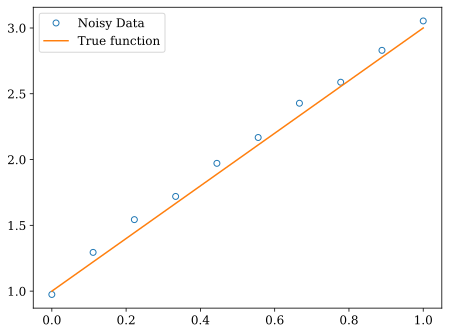

In [11]:
# Sample points
n = 10
x = np.linspace(0,1,n)

# Exact data
a = 1.0
b = 2.0
ye = a + b*x

# Add some noise
y = ye + 0.1*(2*np.random.rand(n)-1)
plt.plot(x,y,'o',label='Noisy Data')
plt.plot(x,ye,label='True function')
plt.legend();

Define the function we want to fit. The first argument is the independent variable, and remaining are the parameters that we want to find.

In [12]:
def f(x,a,b):
    return a + b*x

We can use [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function from scipy to do the fitting.

In [ ]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(f, x, y)
print('Fitted parameters = ',*popt)
plt.plot(x,y,'o',label='Noisy Data')
plt.plot(x,f(x,*popt),label='Fitted function')
plt.plot(x,ye,label='True function')
plt.legend();

We can also use the [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) function or [fit](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html#numpy.polynomial.polynomial.Polynomial.fit) function from numpy to do this. 

In [ ]:
c = np.polyfit(x, y, deg=1)
print('Polynomial coefficients = ',c)

The polynomials coefficients are returned in $c$ in the following order

$$
p(x) = c[0] * x^{deg} + c[1] * x^{deg-1} + \ldots + c[-1]
$$

In [ ]:
p = np.poly1d(c)
plt.plot(x,y,'o',label='Noisy Data')
plt.plot(x,p(x),label='Fitted function')
plt.plot(x,ye,label='True function')
plt.legend();